## Начало лабораторной

Выгрузка данных из csv файла в датафрейм

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("..//..//static//csv//neo.csv")
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


## Диаграмма №1 (Распределения)
Данная диаграмма распределения отображает отношение максимального диаметра астероида к скорости. Что позволяет нам сделать вывод о том, что размер астероида влияет на его скорость.


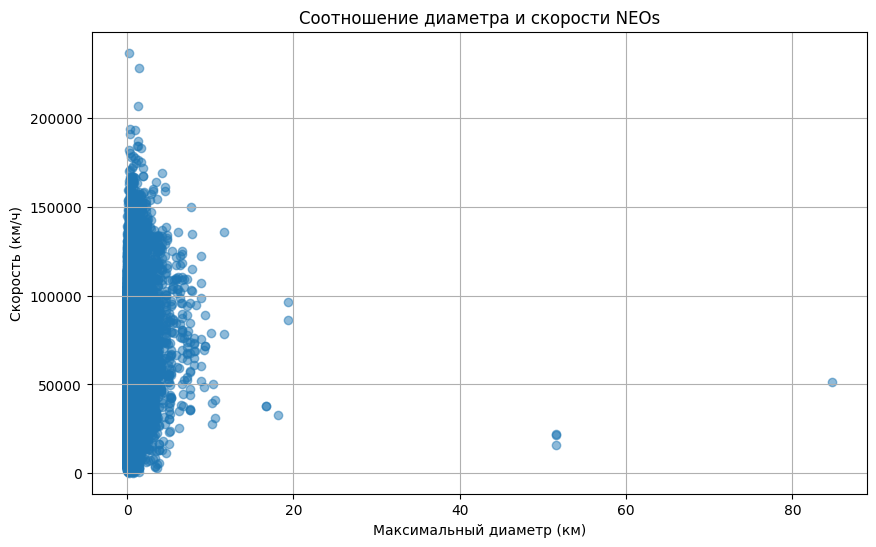

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df['est_diameter_max'], df['relative_velocity'], alpha=0.5)
plt.title('Соотношение диаметра и скорости астероидов')
plt.xlabel('Максимальный диаметр (км)')
plt.ylabel('Скорость (км/ч)')
plt.grid(True)
plt.show()

## Диаграмма №2 (Круговая)
Данная круговая диаграмма показывает процентное соотношение потенциально опасных астероидов к неопасным. Что позволяет нам сделать вывод о доле астероидов, которые считаются опасными

Text(0.5, 1.0, 'Опасные и неопасные объекты')

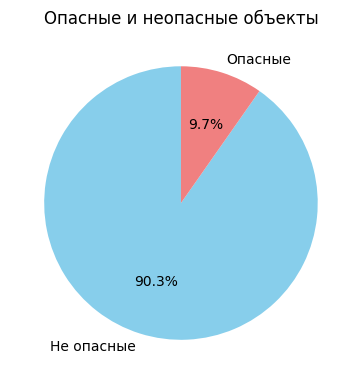

In [8]:
hazardous_counts = df['hazardous'].value_counts()

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.pie(hazardous_counts, labels=['Не опасные', 'Опасные'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Опасные и неопасные объекты')

## Диаграмма №3 (Столбчатая)
Данная столбчатая диаграмма показывает самые частовстречающиеся размеры. Что позволяет сделать вывод о том какого размера астероиды астероиды находятся рядом с нами

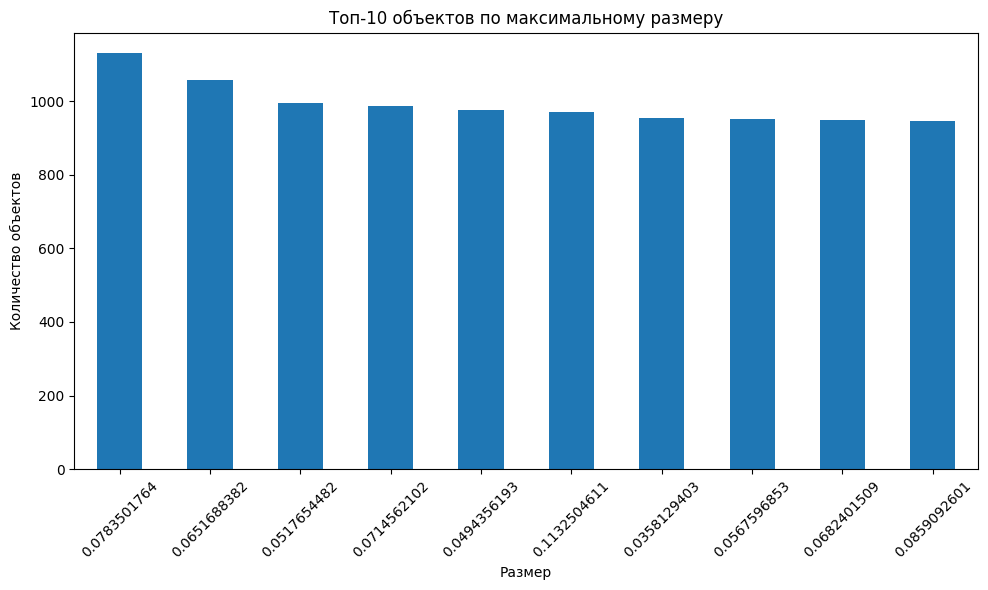

In [13]:
filtered_data = df[['name', 'est_diameter_max']].dropna()

filtered_data['name'] = filtered_data['name'].str[:20] # Сокращаем названия до 20 символов

size_counts = filtered_data['est_diameter_max'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
size_counts.plot(kind='bar')
plt.title('Топ-10 объектов по максимальному размеру')
plt.xlabel('Размер')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()